# <center> <font style="color:rgb(100,109,254)"> Neural Style Transfer</font> </center>


##  <font style="color:rgb(134,19,348)">Import Libraries</font> 


In [1]:
# Import Required libraries
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
import os
%matplotlib inline
import ipywidgets as widgets

##  <font style="color:rgb(134,19,348)">Select Model Path</font> 
you can select one or more model at a time

In [2]:
#model ='Media/M4/Model/style-model/feathers.t7'
model ='Media/M4/Model/style-model/candy.t7'
#model ='Media/M4/Model/style-model/composition_vii.t7'
#model ='Media/M4/Model/style-model/udnie.t7'
#model ='Media/M4/Model/style-model/the_wave.t7'
#model ='Media/M4/Model/style-model/the_scream.t7'
#model ='Media/M4/Model/style-model/mosaic.t7'
#model ='Media/M4/Model/style-model/la_muse.t7'
#model ='Media/M4/Model/style-model/starry_night.t7'


## <font style="color:rgb(134,19,348)"> Initialize the DNN module </font>

In [3]:
# loading the neural style model from disk
net = cv2.dnn.readNetFromTorch(model)

##  <font style="color:rgb(134,19,348)">Read Image</font> 


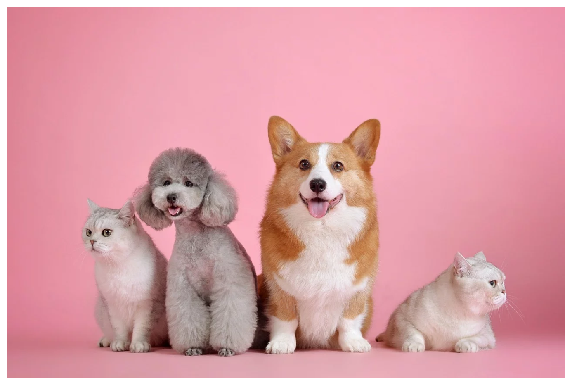

In [4]:
# Read image
image = cv2.imread("Media/M4/1.png")

# Display image
plt.figure(figsize=[10,10])
plt.imshow(image[:,:,::-1])
plt.axis('off');

##  <font style="color:rgb(134,19,348)"> Pre-processing the image 
</font>

In [5]:
# Define RGB value for mean subtraction in blob and after processing we add them back
R,G,B = 103.939, 116.779, 123.680

# Prepare the frame to be fed to the network
blob = cv2.dnn.blobFromImage(image, 1.0, (image.shape[1], image.shape[0]),(R,G,B), swapRB=False, crop=False)

##  <font style="color:rgb(134,19,348)">Forward Pass</font> 


In [6]:
%%time
net.setInput(blob)
output = net.forward()

Wall time: 3.5 s


In [7]:
print(output.shape)

(1, 3, 900, 1352)


Above you can see we got 4D matrix lets understand about them a little bit.

**output:**

- **`1:`**	here 1 indicates that we pass one image in network 
- **`3:`**	 here 3 indicates the 3 color channel in image
- **`900:`**	 Height of the image
- **`1352:`**	 Width of image.

In [8]:
# Here we eliminate the 1st value( No use) and resize it

final_output = output.reshape((3, output.shape[2], output.shape[3])).copy()
print(final_output.shape)

(3, 900, 1352)


In [9]:
# Add mean value which we subracted in blob

final_output[0] += R
final_output[1] += G
final_output[2] += B

In [10]:
# changing its order by transposing the image 

print('shape before transpose: {}'.format(final_output.shape))
final_output = final_output.transpose(1, 2, 0)
print('shape after transpose: {}'.format(final_output.shape))

shape before transpose: (3, 900, 1352)
shape after transpose: (900, 1352, 3)


In [11]:
# Here we are clipping the final output value with the range of 0 -255 and changing the data type to unsigned integer

outmid = np.clip(final_output, 0, 255)
styled= outmid.astype('uint8')

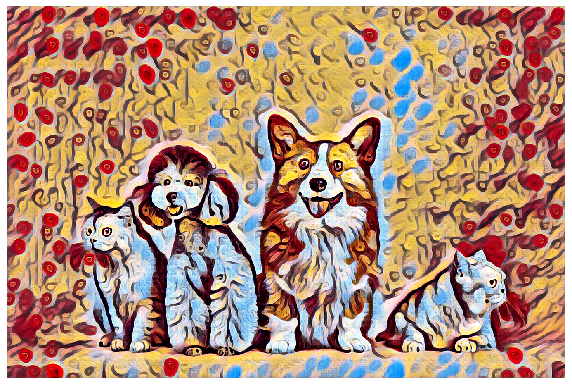

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(styled[:,:,::-1]);plt.axis("off");

## <font style="color:rgb(134,19,348)"> Creating Functions </font> 
Now that we have understood step by step how to create the pipeline for Neural Style Transfer using OpenCV's DNN module, we'll now create functions that do all the above in a single step.

### <font style="color:rgb(134,19,348)"> Initialization Function </font>
This method will be run once and it will initialize the network with the required files.

In [13]:
# Define Model name
model_name= ['feathers', 'candy', 'composition_vii', 'udnie', 'the_wave', 'the_scream', 'mosaic', 'la_muse', 'starry_night']

def init_style_transfer(style="candy",usegpu='None'):
    global net
    if style in model_name:
        model ='Media/M4/Model/style-model/'+style+".t7" 
        net = cv2.dnn.readNetFromTorch(model)
    # If specified use either cuda based Nvidia gpu or opencl based Intel gpu.   
    if usegpu == 'cuda':
        net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
        net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
    elif usegpu == 'opencl':
        net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)    

### <font style="color:rgb(134,19,348)">Main Method </font>

In [14]:
def style_tranfer(image=[], usercam=False,returndata=False):
    if np.size(image) == 0:
        
        # If usercam cam is True then take picture from camera
        if usercam:
            cap=cv2.VideoCapture(0, cv2.CAP_DSHOW)
            ret, frame=cap.read()
            if ret:
                image= cv2.flip(frame,1)
                cap.release()
            else:
                print('Cant Open Camera')
                sys.exit()
                
        # Otherwise select image from computer using tkinter        
        else:
            root = Tk()
            root.filename =  filedialog.askopenfilename(title = "Pick up the Image")
            root.withdraw()
            image = cv2.imread(root.filename)
    R,G,B = 103.939, 116.779, 123.680
    blob = cv2.dnn.blobFromImage(image, 1.0, (image.shape[1], image.shape[0]),(R,G,B), swapRB=False, crop=False)
    net.setInput(blob)
    output = net.forward()
    final_output = output.reshape((3, output.shape[2], output.shape[3])).copy()
    final_output[0] += R
    final_output[1] += G
    final_output[2] += B
    final_output = final_output.transpose(1, 2, 0)
    outmid = np.clip(final_output, 0, 255)
    styled= outmid.astype('uint8')
    
    if  returndata:           
        return styled
    else:
        plt.figure(figsize=(5,5))
        plt.imshow(styled[:,:,::-1]);plt.axis("off");

***Applying Candy Style model***

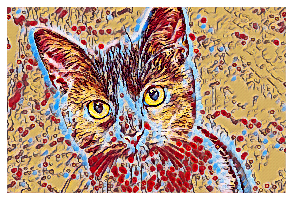

In [15]:
init_style_transfer("candy")
style_tranfer()

***Applying Mosaic Style model***

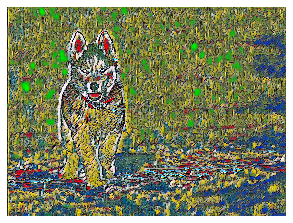

In [16]:
init_style_transfer("la_muse")
style_tranfer()

***Read new image and apply the_scream Style model***

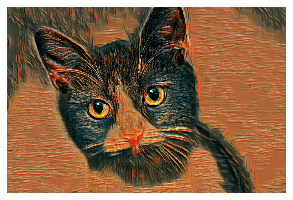

In [17]:
img1 = cv2.imread("Media/M4/cat.jpeg")
init_style_transfer("the_scream")
style_tranfer(img1)

##  <font style="color:rgb(134,19,348)">Iterate all Style model on one image</font> 


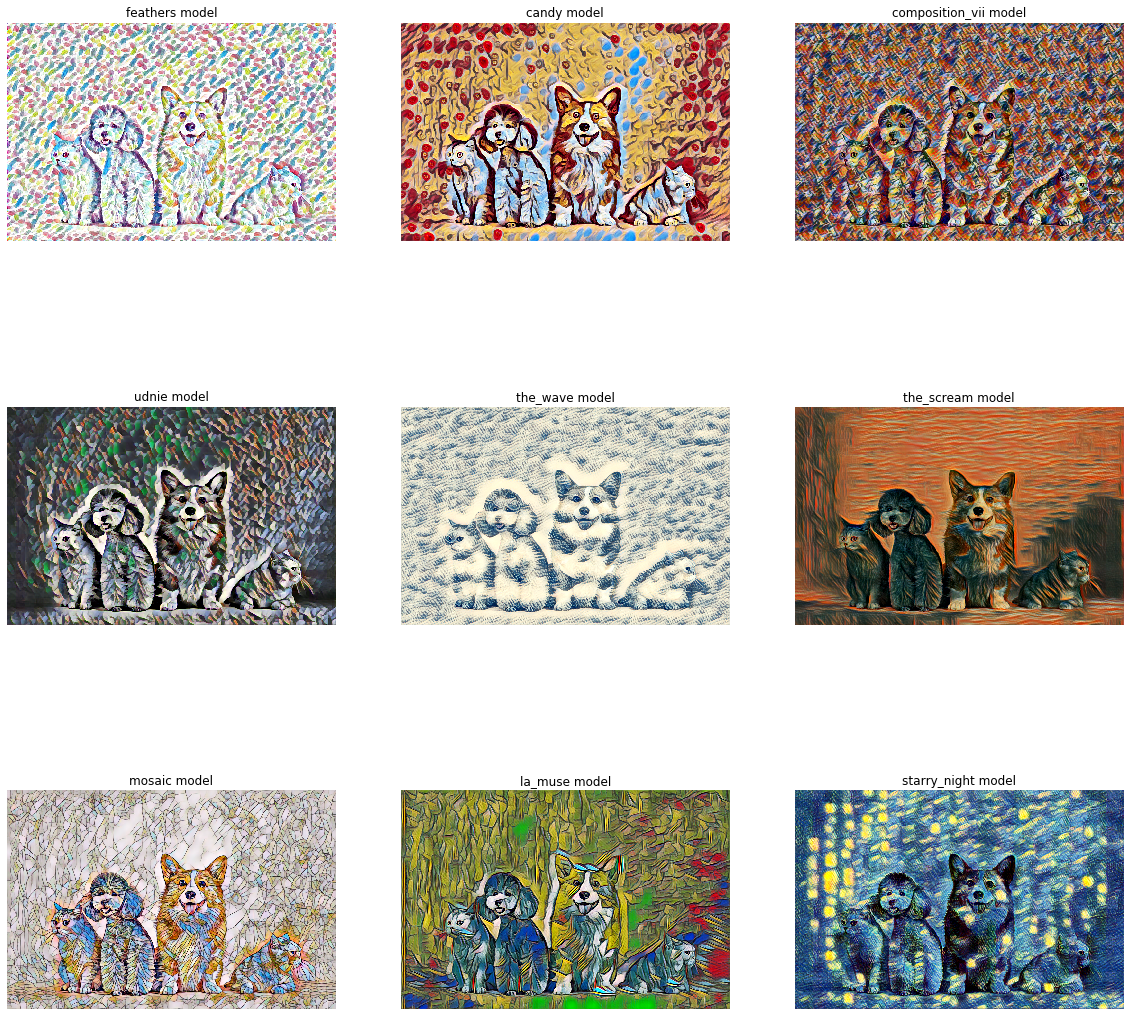

In [18]:
# Defining rows and columns
rows = 3

# Define Figure Size
plt.figure(figsize=(20,20));

# Show all points with prob map
for i,model in enumerate(model_name):
    init_style_transfer(model)
    styled = style_tranfer(image,returndata=True);
    plt.subplot(rows, 3,i+1);plt.imshow(styled[:,:,::-1]);plt.title(model + " model");plt.axis("off") 

####  Capturing Image from Camera also change the style

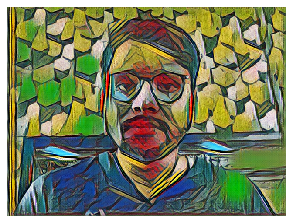

In [37]:
init_style_transfer("la_muse")
style_tranfer(usercam=True)

## <font style="color:rgb(134,19,348)"> Using Intel & Nvidia GPUs </font>
Note using GPU Increases the Speed, it may or may not be available on your PC. <br>
Also remember the first iteration is going take a long time but the next iterations will be fast. Also there are some models which perform slower in GPU as compared to CPU.

**Note: Obviously GPU only works if you have them in your system**

**CPU Time**

In [38]:
image = cv2.imread("Media/M4/1.png")
init_style_transfer()

In [42]:
%%time
image= style_tranfer(image = image, returndata=True)

Wall time: 3.72 s


**Intel GPU**

In [12]:
init_style_transfer(usegpu = 'opencl')

In [13]:
%%time
image= style_tranfer(image = image, returndata=True)

Wall time: 1min 11s


**NVIDIA GPU**

In [14]:
init_style_transfer(usegpu = 'cuda')

In [16]:
%%time
image= style_tranfer(image = image, returndata=True)

Wall time: 3.73 s


## <font style="color:rgb(134,19,348)"> Real time Neural Style Transfer</font>

In [20]:
fps=0
init_style_transfer()
cap=cv2.VideoCapture(0)

while(True):    
    
    ret,frame=cap.read() 
    image=cv2.flip(frame,1)
    
    image = style_tranfer(image=image, returndata=True)
    
    cv2.imshow("Neural Style Transfer",image)
    
    k = cv2.waitKey(1)
    
    if k == ord('q'):
        break
cap.release() 
cv2.destroyAllWindows() 